In [1]:
%pylab inline
import csv, re
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
experiments = []
percorso = "../models/exports/Stabilita/ticket_trend_"
for i in range(10):
    try:
        experiments.append(pd.read_csv(percorso+"15000_"+str(i)+".csv",names=['Time','2','3','4','Abbonati','Utility','Total_risk']))
        experiments.append(pd.read_csv(percorso+"b_"+"15000_"+str(i)+".csv",names=['Time','2','3','4','Abbonati','Utility','Total_risk']))
    except:
        pass

In [3]:
print experiments[1]['Time'][0]

280.0


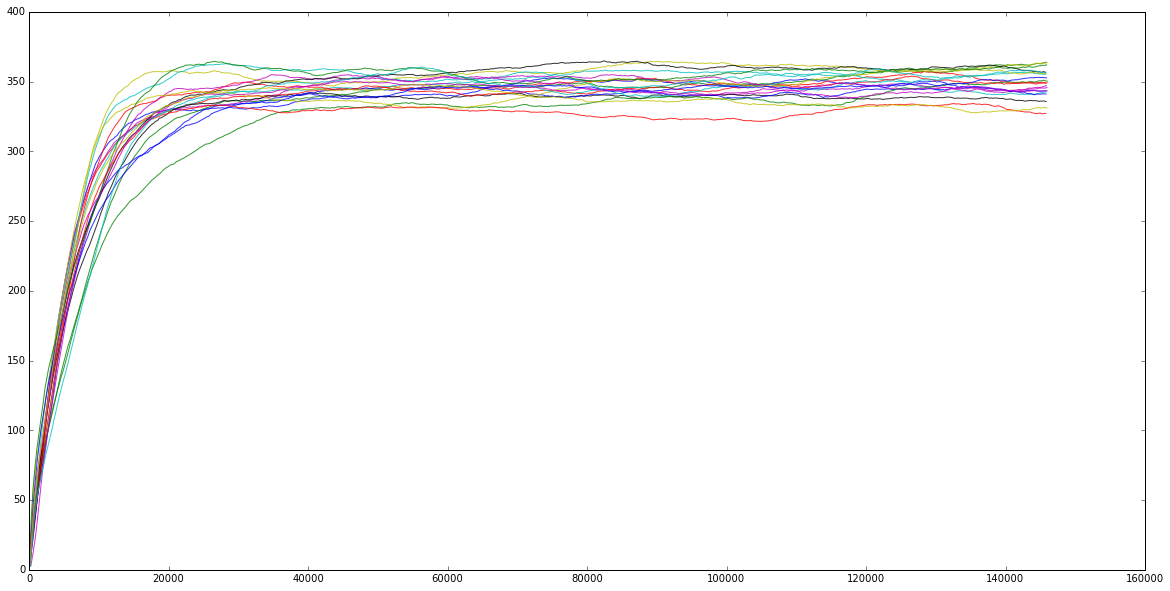

In [4]:
figsize(20,10)
for expo in experiments:
#    plot(expo['Time'],expo['Abbonati'],'b-')
     plot(expo['Time'], expo['Total_risk'], alpha = 0.8)

In [5]:
time_risk = [[] for i in experiments[1]['Time']]#contiene tutti e 520 i tempi, e per ognuno, il rischio in ogni esperimento
for j in range(len(time_risk)):
    for expo in experiments:
        time_risk[j].append(expo['Total_risk'][j])
print shape(time_risk)

(521, 20)


In [6]:
medie = []
stds = []
for i in range(len(time_risk)):
    medie.append(mean(time_risk[i]))
    stds.append(std(time_risk[i]))

In [7]:
from scipy.optimize import curve_fit
def carica_cond (t,A,tao):
    return A*(1-exp(-t/tao))
popt, pcov = curve_fit(carica_cond, linspace(1,len(medie),len(medie)),ravel(medie),sigma = ravel(stds),absolute_sigma = True)
print popt
print pcov

[ 346.64469817   24.18530992]
[[ 0.17044808  0.04861109]
 [ 0.04861109  0.27103049]]


In [8]:
x = array(experiments[1]['Time'])

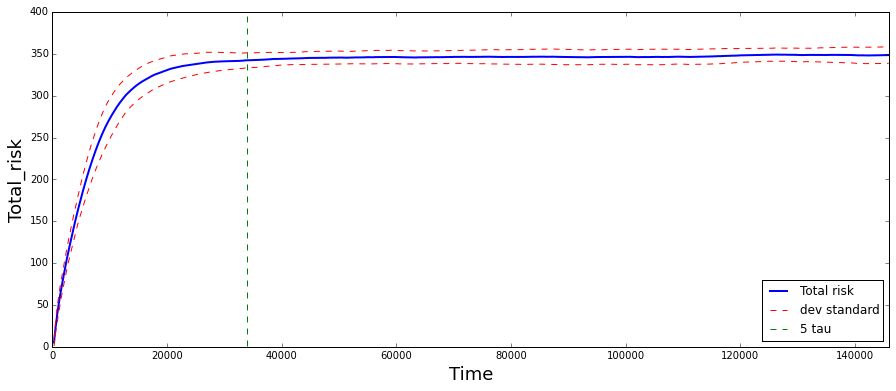

In [9]:
fig2 = plt.figure(2, figsize=(15, 6))
ax = fig2.add_subplot(111)
graph = ax.plot(experiments[1]['Time'],medie,linewidth=2, label='Total risk')
graph2 = ax.plot(experiments[1]['Time'],array(medie)+array(stds),'r--', label = 'dev standard')
graph3 = ax.plot(experiments[1]['Time'],array(medie)-array(stds),'r--')
graph4 = ax.plot(popt[1]*280*5*ones(100),linspace(1,400,100),'g--', label = '5 tau')
ax.set_xlim([0, 146000])
plt.xlabel('Time',fontsize=18)
plt.ylabel('Total_risk',fontsize=18)
plt.legend(loc=4)
savefig('Stabilita_risk.png')

# Correlazione rischio-abbonamenti

In [10]:
time_abbonati = [[] for i in experiments[1]['Time']]
for j in range(len(time_abbonati)):
    for expo in experiments:
        time_abbonati[j].append(expo['Abbonati'][j])
print shape(time_abbonati)

(521, 20)


In [11]:
medieab = [[] for i in experiments[1]['Time']]
stdsab=[]
for i in range(len(time_abbonati)):
    medieab[i].append(mean(time_abbonati[i]))
    stdsab.append(std(time_abbonati[i]))
medieab= ravel(medieab)
medieri= ravel(medie)

In [17]:
import scipy.stats
scipy.stats.kendalltau(medieab, medieri)

(0.21149361057106467, 5.3186046030568248e-13)

In [20]:
import csv
with open("../models/exports/Stabilita/abb_risk.csv",'w') as csvfile:
    for i in range(len(medieab)):
        csvfile.write(str(280*(i+1)) + ","+ str(medie[i]) + "," + str(medie[i]) + "\n")

In [33]:
corrcoef(medie[120:],medieab[120:])

array([[ 1.        ,  0.27178411],
       [ 0.27178411,  1.        ]])

In [34]:
scipy.stats.spearmanr(medieab[120:], medie[120:])

(0.29275042100691512, 2.2947912397348831e-09)

In [29]:
scipy.stats.kendalltau(medieab[:100],medie[:100])

(0.68794828111408934, 3.6146153879610894e-24)

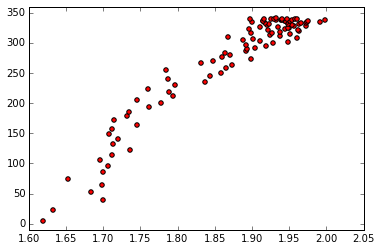

In [51]:
fig3 = plt.figure(2, figsize=(6, 4))
ax = fig3.add_subplot(111)
graph3 = ax.scatter(medieab[:100],medieri[:100], c=u'r')
ax.set_xlim([1.6, 2.05])
ax.set_ylim(-10,360)
savefig('Correlazioni.png')